<a href="https://colab.research.google.com/github/rcazevedo/Fuzzy-Sets/blob/main/INPE_Fuzzy_Serie4_Soma_Subtracao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- Tabela Grid: A ---
Alpha 0 1 2 3 4 5 6
  1.0       1      
  0.9       1      
  0.8       1      
  0.7       1      
  0.6     1 1 1    
  0.5     1 1 1    
  0.4     1 1 1    
  0.3   1 1 1 1 1  
  0.2   1 1 1 1 1  
  0.1   1 1 1 1 1  
  0.0 1 1 1 1 1 1 1

--- Tabela Grid: B ---
Alpha 4 5 6 7 8 9 10
  1.0       1       
  0.9       1       
  0.8       1       
  0.7       1       
  0.6     1 1 1     
  0.5     1 1 1     
  0.4     1 1 1     
  0.3   1 1 1 1 1   
  0.2   1 1 1 1 1   
  0.1   1 1 1 1 1   
  0.0 1 1 1 1 1 1  1

--- Tabela Grid: C ---
Alpha 4 5 6 7 8 9 10 11 12 13 14 15 16
  1.0              1                  
  0.9              1                  
  0.8           1  1  1               
  0.7           1  1  1               
  0.6         1 1  1  1  1            
  0.5       1 1 1  1  1  1  1         
  0.4       1 1 1  1  1  1  1         
  0.3     1 1 1 1  1  1  1  1  1      
  0.2     1 1 1 1  1  1  1  1  1      
  0.1   1 1 1 1 1  1  1  1  1  1  1   
  0.0 1

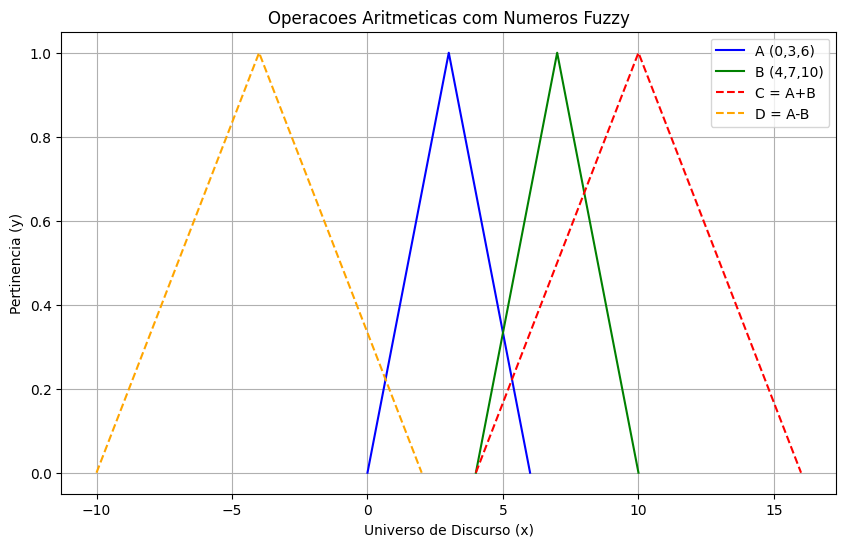

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def get_interval(alpha, a, b, c):
    """Retorna intervalo [L, R] para corte-alfa de triangulo (a,b,c)."""
    L = a + alpha * (b - a)
    R = c - alpha * (c - b)
    return L, R

def print_grid_table(name, interval_func, x_range, alphas):
    """Gera e imprime a tabela grid de pertinencia (0 ou 1)."""
    print(f"\n--- Tabela Grid: {name} ---")
    header = ["Alpha"] + [str(x) for x in x_range]
    rows = []

    # Iterar de alpha=1.0 ate 0.0
    for alpha in sorted(alphas, reverse=True):
        L, R = interval_func(alpha)
        row_data = [f"{alpha:.1f}"]
        for x in x_range:
            # Verifica se o inteiro x esta dentro do intervalo [L, R]
            # Usamos uma pequena tolerancia para erros de ponto flutuante
            if L - 1e-5 <= x <= R + 1e-5:
                row_data.append("1")
            else:
                row_data.append("") # Vazio onde nao pertence
        rows.append(row_data)

    df = pd.DataFrame(rows, columns=header)
    print(df.to_string(index=False))

# Parametros
alphas = np.linspace(0, 1, 11)

# Funcoes lambda para capturar os intervalos de cada conjunto
func_A = lambda a: get_interval(a, 0, 3, 6)
func_B = lambda a: get_interval(a, 4, 7, 10)
func_C = lambda a: (func_A(a)[0] + func_B(a)[0], func_A(a)[1] + func_B(a)[1])
func_D = lambda a: (func_A(a)[0] - func_B(a)[1], func_A(a)[1] - func_B(a)[0])

# Gerar Tabelas no Console (para verificacao)
# A: range 0 a 6
print_grid_table("A", func_A, range(0, 7), alphas)
# B: range 4 a 10
print_grid_table("B", func_B, range(4, 11), alphas)
# C (Soma): range 4 a 16
print_grid_table("C", func_C, range(4, 17), alphas)
# D (Subtracao): range -10 a 2
print_grid_table("D", func_D, range(-10, 3), alphas)

# Plotagem Grafica
plt.figure(figsize=(10, 6))
plt.plot([0, 3, 6], [0, 1, 0], label='A (0,3,6)', color='blue')
plt.plot([4, 7, 10], [0, 1, 0], label='B (4,7,10)', color='green')
plt.plot([4, 10, 16], [0, 1, 0], label='C = A+B', color='red', linestyle='--')
plt.plot([-10, -4, 2], [0, 1, 0], label='D = A-B', color='orange', linestyle='--')
plt.title("Operacoes Aritmeticas com Numeros Fuzzy")
plt.xlabel("Universo de Discurso (x)")
plt.ylabel("Pertinencia (y)")
plt.legend()
plt.grid(True)
plt.savefig("FSE4.2.jpg")
plt.show()